# Exploratry Data Analysis

The following is an EDA to understand our data **The Movies Dataset** from kaggle: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data?select=movies_metadata.csv specifically the `movies_metadata.csv`

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
df = pd.read_csv("../data/movies_metadata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

/var/folders/4v/n05vgwdj65b8dkvc11yd9bzr0000gn/T/ipykernel_22599/1133841723.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/movies_metadata.csv")


In [209]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [210]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Discard useless columns

It appears there are a lot of columns that wouldn't be useful for our models like:
- adult: we are not intersted in filtering content right now
- homepage: Not relevant for our model
- etc...

Why we choosed these columns? These are my assumptions:
- id: its essential of we will use other files in The Movies Datasets
- imdb_id: it could be unnecessary for the recommender but it would be useful for our front-end later on
- budget: Can be indirectly correlated with popularity or user ratings.
- genres: Users often prefer movies within specific genres.
- production_companies: Could be useful in learning user's like a certain company
- original_language: Relevant if language preferences are known for the user.
- overview: Relevant for the LLM model
- popularity: Relevant as it could help recommend movies that are widely liked.
- release_date: Relevant if the users like newer movies or have an era preference
- revenue: Indirectly relevant as it could indicate a movie's success and thus its appeal to a broad audience.
- runtime: Relevant if the user prefer a certain length
- vote_average, vote_count: Highly relevant as indicators of a movie's overall reception and quality.

In [211]:
useful_columns = [
    "id",
    "imdb_id",
    "title",
    "budget",
    "genres",
    "production_companies",
    "original_language",
    "overview",
    "popularity",
    "release_date",
    "revenue",
    "runtime",
    "vote_average",
    "vote_count",
]

df = df[useful_columns].reset_index(drop=True)
df.head()

,id,imdb_id,title,budget,genres,production_companies,original_language,overview,popularity,release_date,revenue,runtime,vote_average,vote_count
0,862,tt0114709,Toy Story,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0
1,8844,tt0113497,Jumanji,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0
2,15602,tt0113228,Grumpier Old Men,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,6.5,92.0
3,31357,tt0114885,Waiting to Exhale,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,6.1,34.0
4,11862,tt0113041,Father of the Bride Part II,0,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...",en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45466 non-null  object 
 1   imdb_id               45449 non-null  object 
 2   title                 45460 non-null  object 
 3   budget                45466 non-null  object 
 4   genres                45466 non-null  object 
 5   production_companies  45463 non-null  object 
 6   original_language     45455 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45461 non-null  object 
 9   release_date          45379 non-null  object 
 10  revenue               45460 non-null  float64
 11  runtime               45203 non-null  float64
 12  vote_average          45460 non-null  float64
 13  vote_count            45460 non-null  float64
dtypes: float64(4), object(10)
memory usage: 4.9+ MB


## Before Visualization
Let's adjust the data types even if this is a preprocessing step, but to help us visualize better.

In [213]:
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

In [214]:
df.describe()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45460.000000,45376,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,2.921478,1992-05-15 17:10:50.564174976,1.120935e+07,94.128199,5.618207,109.897338
min,0.000000e+00,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.385948,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,1.127685,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,3.678902,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000
std,1.742413e+07,6.005414,NaN,6.433225e+07,38.407810,1.924216,491.310374


In [215]:
df.isna().sum()

id                        0
imdb_id                  17
title                     6
budget                    3
genres                    0
production_companies      3
original_language        11
overview                954
popularity                6
release_date             90
revenue                   6
runtime                 263
vote_average              6
vote_count                6
dtype: int64

## Let's visualize the dataset

#### Firstly I have some questions to be answered (mostly just curious)
- What is the relation between the budget of a movie and its populariy?
- What is the relation between the genere and its popularity?
- What is the average popularity per genere over time?
- What is the distribution of movies across different genres?
- What is the relation between a movie's popularity and its revenue?
- Is there is a relation between a movie's release data and its vote-average?
- Is there is a relation between a movie's popularity and it's runtime?
- What is the relation between a movies budget per genere?
- What is the relation between a movies revenue per genere?
- Is there is outliers in the data?

#### What is the relation between the budget of a movie and its populariy?

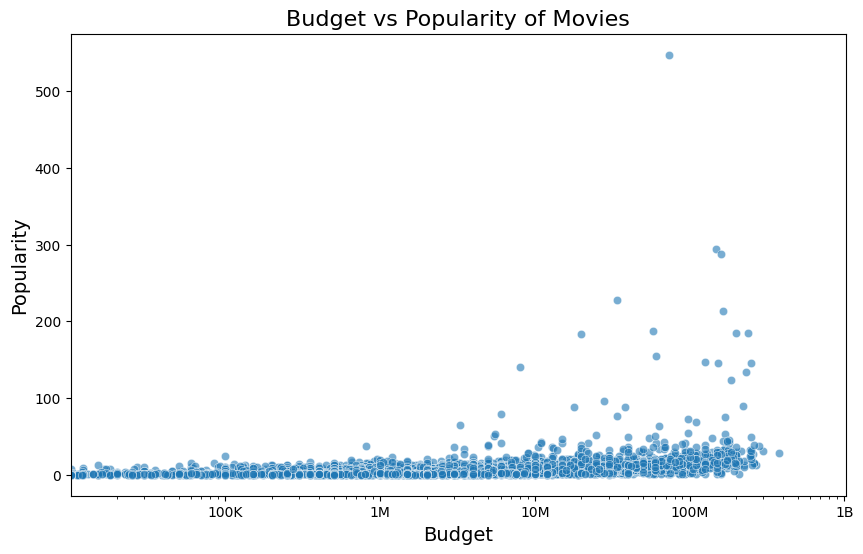

In [216]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="budget", y="popularity", data=df, alpha=0.6)

plt.title("Budget vs Popularity of Movies", fontsize=16)
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.xscale("log")
plt.xlim(left=1e4)
plt.xticks(
    [1e5, 1e6, 1e7, 1e8, 1e9],
    ["100K", "1M", "10M", "100M", "1B"],
)
plt.show()

There are some outliers that makes it hard to visualize the relationship, so, i will temporarly skip them

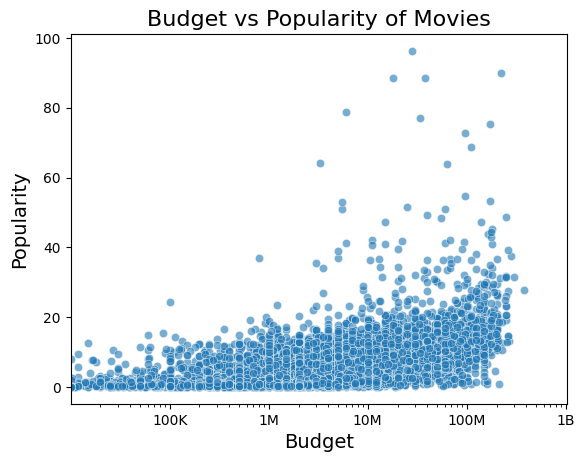

In [217]:
filtered_df = df[df["popularity"] < 100]
sns.scatterplot(x="budget", y="popularity", data=filtered_df, alpha=0.6)

plt.title("Budget vs Popularity of Movies", fontsize=16)
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.xscale("log")
plt.xlim(left=1e4)
plt.xticks(
    [1e5, 1e6, 1e7, 1e8, 1e9],
    ["100K", "1M", "10M", "100M", "1B"],
)
plt.show()

So to answer the question what is the relation between the budget of a movie and its populariy? there seems to be a positive correlation between them

#### What is the relation between the genere and its popularity?

The genres series is a nested object in the generes column as we seen in the df.head() before. So, we need to extract them

Let's first create a simpler way to deal with them with creating a new coulmn that has a list of generes

In [218]:
import json


def extract_genres(genres_str):
    try:
        genres_list = json.loads(genres_str.replace("'", '"'))
        genres = [genre["name"] for genre in genres_list]
        return genres
    except:
        return []


df["genres_list"] = df["genres"].apply(extract_genres)

df_exploded_genres = df.explode("genres_list")

genre_popularity = (
    df_exploded_genres.groupby("genres_list")["popularity"].mean().reset_index()
)

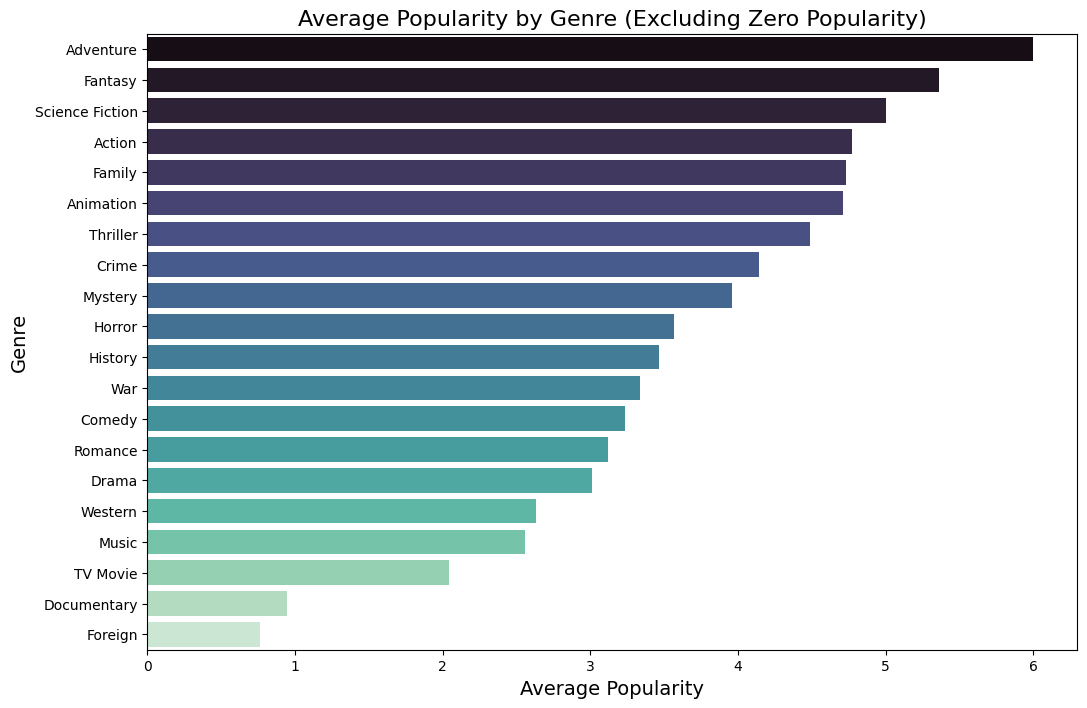

In [219]:
genre_popularity_sorted = genre_popularity.sort_values("popularity", ascending=False)

genre_popularity_filtered = genre_popularity_sorted[
    genre_popularity_sorted["popularity"] > 0
]

plt.figure(figsize=(12, 8))
sns.barplot(
    x="popularity",
    y="genres_list",
    data=genre_popularity_filtered,
    palette="mako",
    hue="genres_list",
)
plt.title("Average Popularity by Genre (Excluding Zero Popularity)", fontsize=16)
plt.xlabel("Average Popularity", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.show()

In simple terms, the relationship between genre and movie popularity is that certain genres, like Adventure, Science Fiction, and Fantasy, tend to be more popular and attract more viewers, while others, such as Documentaries and Historical films, are generally less popular. This suggests that the genre of a movie significantly influences how appealing it is to the wider audience.

#### What is the average popularity per genere over time?

To answer the question we need to a couple of steps.

1. Extracting the release year from the release_date column.
2. Using the previously extracted genre information.
3. Grouping the data by genre and release year to calculate the average popularity.

In [220]:
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

df_exploded_genres["release_year"] = df_exploded_genres["release_date"].apply(
    lambda x: str(x).split("-")[0] if pd.notnull(x) else None
)

df_exploded_genres["release_year"] = pd.to_numeric(
    df_exploded_genres["release_year"], errors="coerce"
)

selected_genres = [
    "Action",
    "Adventure",
    "Comedy",
    "Drama",
    "Science Fiction",
    "Fantasy",
    "Thriller",
    "Romance",
    "Horror",
    "Animation",
]

genre_yearly_popularity = (
    df_exploded_genres.groupby(["genres_list", "release_year"])["popularity"]
    .mean()
    .reset_index()
)

genre_yearly_popularity = genre_yearly_popularity[
    (genre_yearly_popularity["genres_list"].isin(selected_genres))
    & (genre_yearly_popularity["release_year"] >= 2000)
]

genre_yearly_popularity = genre_yearly_popularity.dropna(subset=["release_year"])

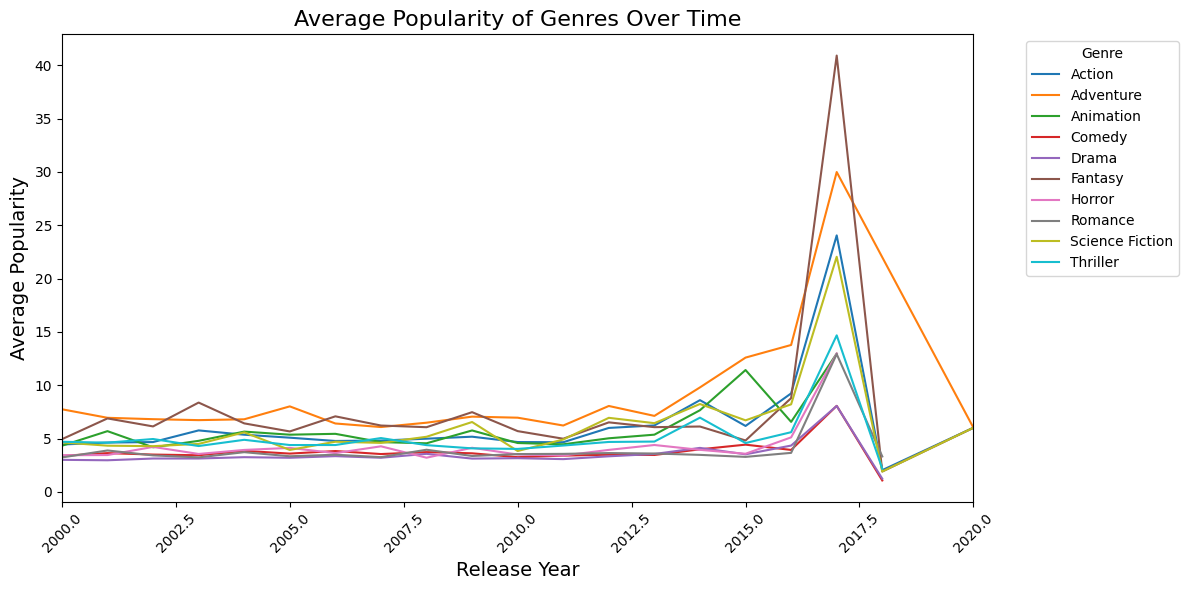

In [221]:
genre_yearly_popularity_pivot = genre_yearly_popularity.pivot(
    index="release_year", columns="genres_list", values="popularity"
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=genre_yearly_popularity_pivot, dashes=False, legend="full", palette="tab10"
)

plt.title("Average Popularity of Genres Over Time", fontsize=16)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Average Popularity", fontsize=14)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.xlim(
    genre_yearly_popularity_pivot.index.min(), genre_yearly_popularity_pivot.index.max()
)
plt.tight_layout()

plt.show()

the graph shows us how audience preferences for movie genres have evolved throughout the years. Like how fantasy became more popular than adventure back in 2017. 

#### What is the distribution of movies across different genres?

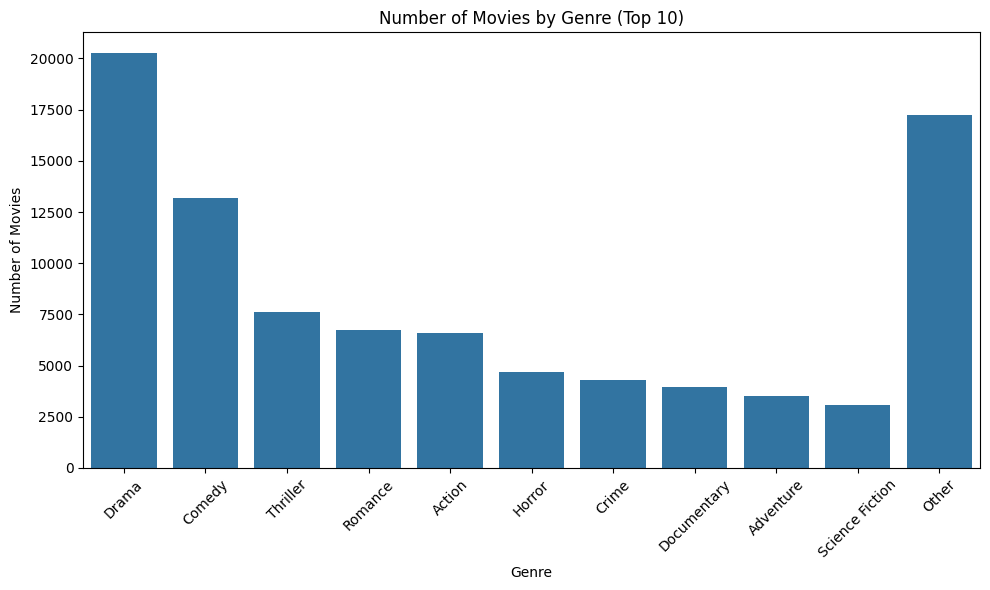

In [222]:
genre_counts = df.explode("genres_list")["genres_list"].value_counts()

top_10_genres = genre_counts.head(10)
top_10_genres["Other"] = genre_counts[10:].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.title("Number of Movies by Genre (Top 10)")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I guess people love to cry a lot and then laugh?

#### What is the relation between a movie's popularity and its revenue?

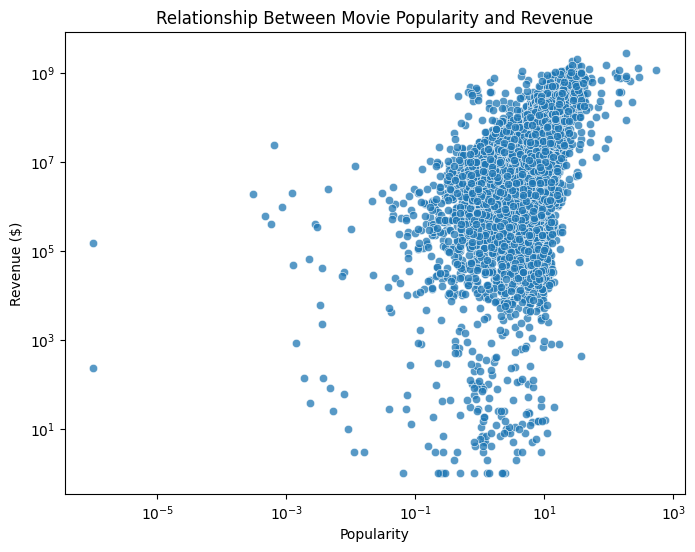

In [223]:
filtered_data = df[(df["revenue"] > 0) & (df["popularity"] > 0)]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x="popularity", y="revenue", alpha=0.75)
plt.title("Relationship Between Movie Popularity and Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue ($)")
plt.xscale("log")
plt.yscale("log")
plt.show()

There is a positive correlation between a movie's popularity and its revenue. There are outliers in the data, with some movies achieving exceptionally high revenue or popularity that doesn't strictly align with the general trend.

#### Is there is a relation between a movie's release data and its votes average?

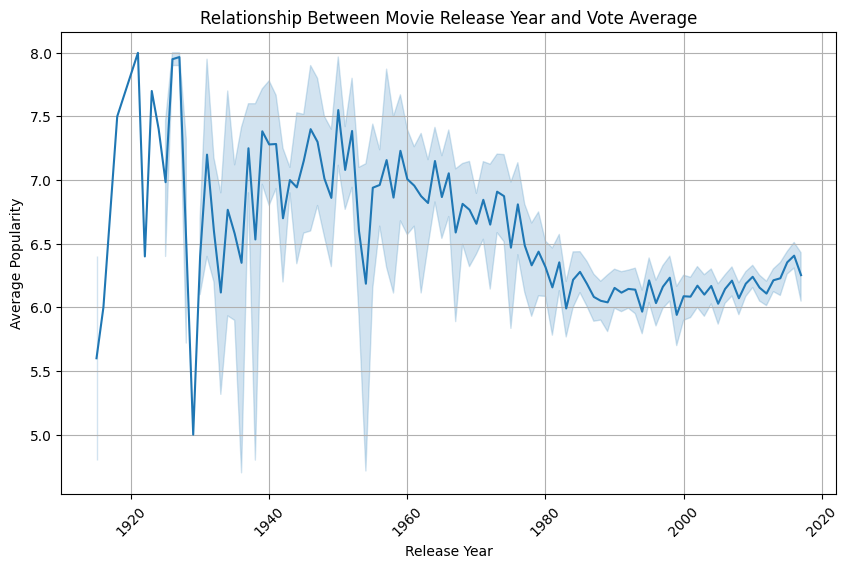

In [224]:
filtered_data.loc[:, "release_year"] = filtered_data["release_date"].dt.year

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_data,
    x="release_year",
    y="vote_average",
    estimator="mean",
)
plt.title("Relationship Between Movie Release Year and Vote Average")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There appears to be a decrease in the average vote scores of movies over time, reinforcing the statement "Old is Gold"

#### Is there is a relation between a movie's vote average and it's runtime?

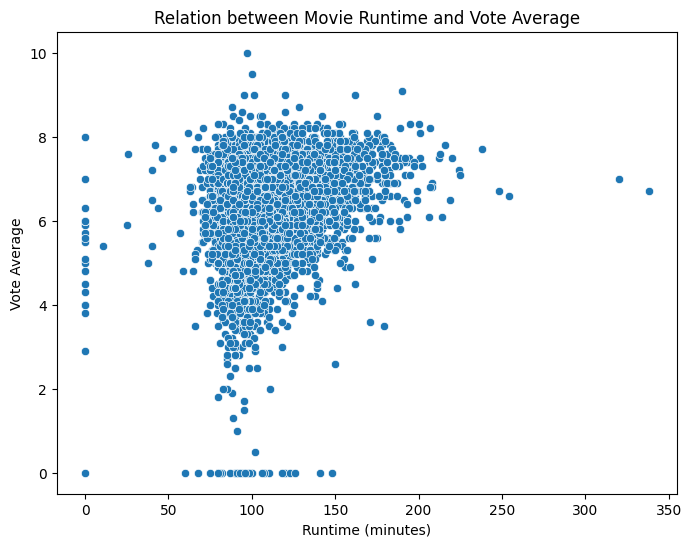

In [225]:
plt.figure(figsize=(8, 6), edgecolor="black")
sns.scatterplot(data=filtered_data, x="runtime", y="vote_average")
plt.title("Relation between Movie Runtime and Vote Average")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Vote Average")
plt.grid(False)
plt.show()

It appears that there is no relation between the average votes and the movie's runtime

#### What is the relation between a movies budget per genere? && What is the relation between a movies revenue per genere?

In [226]:
top_10_genre_budget_avg = (
    df_exploded_genres.groupby("genres_list")["budget"]
    .mean()
    .reset_index()
    .sort_values(by="budget", ascending=False)
    .head(10)
)

top_10_genre_revenue_avg = (
    df_exploded_genres.groupby("genres_list")["revenue"]
    .mean()
    .reset_index()
    .sort_values(by="revenue", ascending=False)
    .head(10)
)

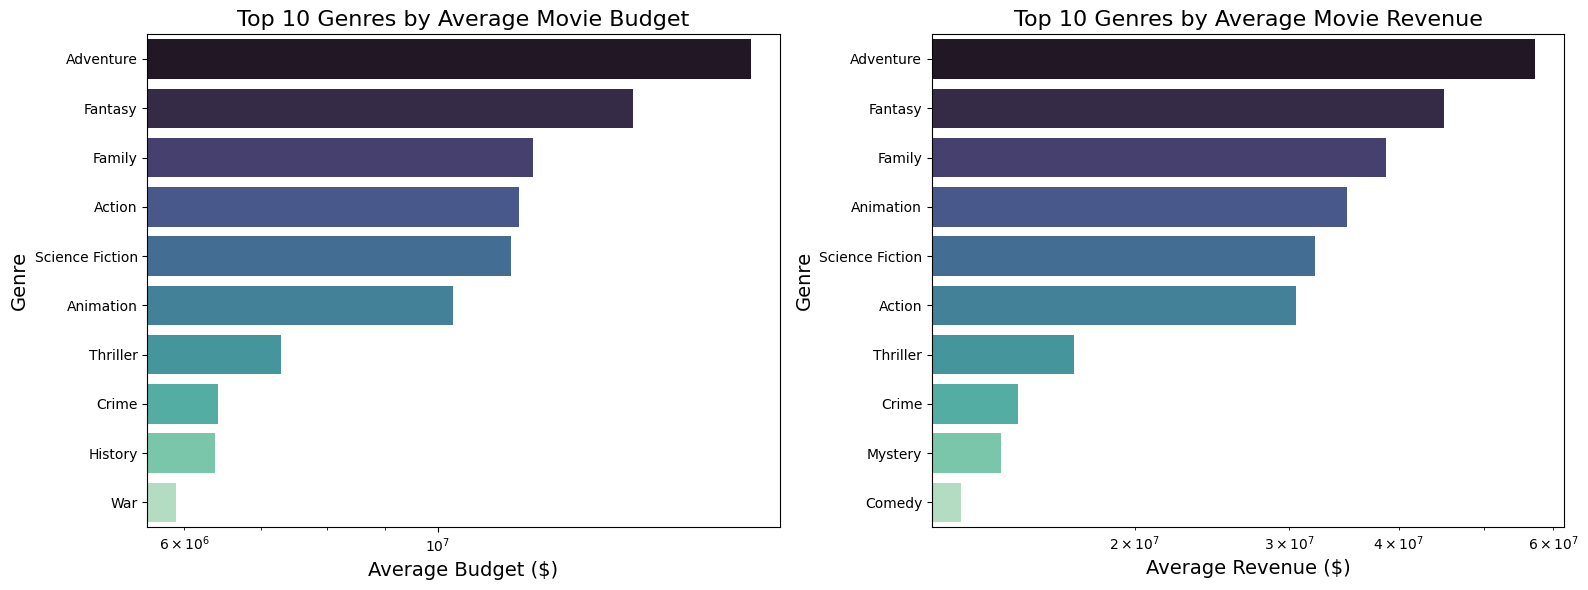

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    x="budget",
    y="genres_list",
    data=top_10_genre_budget_avg,
    palette="mako",
    hue="genres_list",
    ax=axes[0],
)

axes[0].set_title("Top 10 Genres by Average Movie Budget", fontsize=16)
axes[0].set_xlabel("Average Budget ($)", fontsize=14)
axes[0].set_ylabel("Genre", fontsize=14)
axes[0].set_xscale("log")

sns.barplot(
    x="revenue",
    y="genres_list",
    data=top_10_genre_revenue_avg,
    palette="mako",
    hue="genres_list",
    ax=axes[1],
)
axes[1].set_title("Top 10 Genres by Average Movie Revenue", fontsize=16)
axes[1].set_xlabel("Average Revenue ($)", fontsize=14)
axes[1].set_ylabel("Genre", fontsize=14)
axes[1].set_xscale("log")

plt.tight_layout()
plt.show()

The data indicates that higher budgets in genres such as Adventure and Fantasy correlate with higher revenues, suggesting that investment in these genres is typically met with substantial box office returns.

#### Is there outliers in the data?

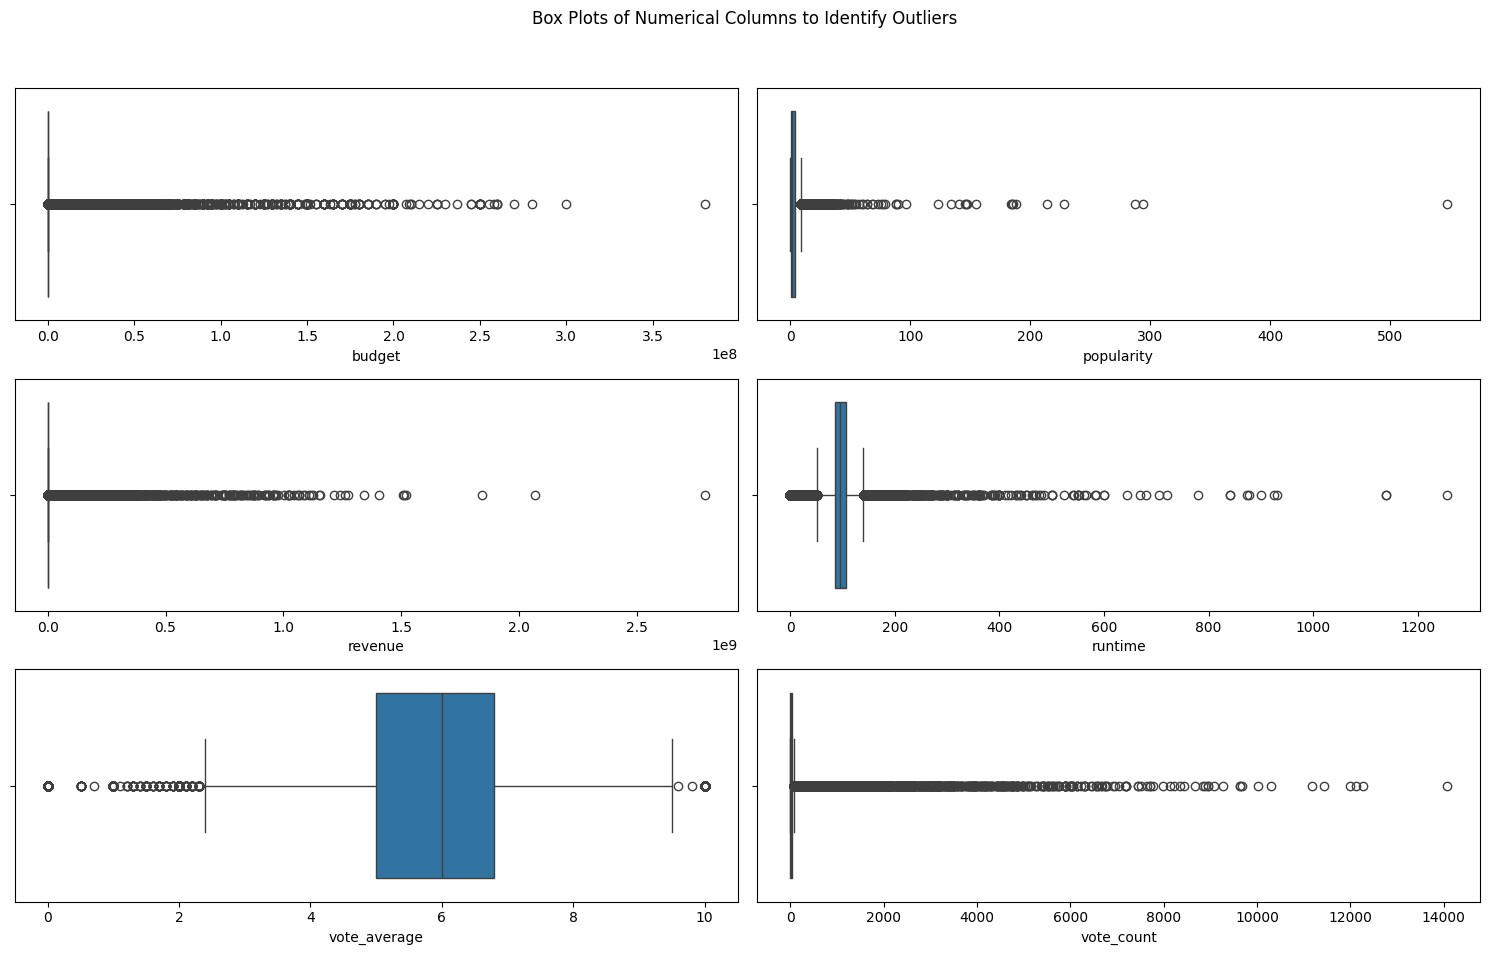

In [228]:
numerical_cols = [
    "budget",
    "popularity",
    "revenue",
    "runtime",
    "vote_average",
    "vote_count",
]
df_numerical = df[numerical_cols]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle("Box Plots of Numerical Columns to Identify Outliers")

for idx, col in enumerate(df_numerical.columns):
    sns.boxplot(x=df_numerical[col], ax=axes[idx // 2, idx % 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Budget:
- There are movies with a budget of 0, which could either represent missing data or movies with genuinely no budget reported.
Several outliers have exceptionally high budgets, significantly above the majority of the movies.

Popularity:
- The popularity scores have a wide range, with some movies having extremely high scores that deviate significantly from the rest.

Revenue:
- Similar to the budget, many movies have reported revenues of 0, which might need further investigation.
- There are outliers on the higher end, indicating movies with exceptionally high revenues.

Runtime:
- The runtime has outliers on both ends, with some movies having 0 minutes (which could be errors or placeholder values) and others with excessively long runtimes.

Vote Average:
- The vote average seems to be well-distributed, but there are movies with a 0 rating, which might indicate no votes were cast or data is missing.

Vote Count:
- A significant disparity in vote counts, with some movies having an unusually high number of votes compared to the rest.

#### Let's investegate

In [229]:
zero_values_count = {
    "budget_zero_count": (df["budget"] == 0).sum(),
    "popularity_zero_count": (df["popularity"] == 0).sum(),
    "revenue_zero_count": (df["revenue"] == 0).sum(),
    "runtime_zero_count": (df["runtime"] == 0).sum(),
    "vote_average_zero_count": (df["vote_average"] == 0).sum(),
}

zero_values_count

{'budget_zero_count': 36573,
 'popularity_zero_count': 66,
 'revenue_zero_count': 38052,
 'runtime_zero_count': 1558,
 'vote_average_zero_count': 2998}

One of the way to deal with this number of zeros could be imputation.

These are notes for the data prepartion phase.

It could be one of these ways:
1. Predictive Modeling: Building a model to predict budget or revenue based on other features (e.g., genre, popularity, runtime) could provide more accurate results
2. Binning: Instead of treating budget and revenue as continuous variables, you can categorize them into bins (e.g., low, medium, high).
3. Data Augmentation: Seek out additional data sources to fill in the missing budget and revenue information. 

Next, let's identify the high-values ouliters specially in budget, popularity, revenue and vote_count.

To identify high-values outliers we can use statistcal methods, such as, the values above a certain threshold are considered outliers (e.g. 1.5 times the interquartile range (IQR) above the third quartile, as outliers). Given the nature of our dataset we can take a more tailoerd approach, such as identifying the top 1% values in each column.

In [230]:
outlier_thresholds = {
    col: df[col].quantile(0.99)
    for col in ["budget", "popularity", "revenue", "vote_count"]
}

outliers = df[
    (df["budget"] > outlier_thresholds["budget"])
    | (df["popularity"] > outlier_thresholds["popularity"])
    | (df["revenue"] > outlier_thresholds["revenue"])
    | (df["vote_count"] > outlier_thresholds["vote_count"])
].reset_index()

print(f"Outliers thresholds: {outlier_thresholds}")

outliers[
    ["title", "budget", "popularity", "revenue", "vote_count", "release_year"]
].head()

Outliers thresholds: {'budget': 87000000.0, 'popularity': 17.00273717999992, 'revenue': 273087551.65999836, 'vote_count': 2183.8199999999924}


,title,budget,popularity,revenue,vote_count,release_year
0,Toy Story,30000000.0,21.946943,373554033.0,5415.0,1995.0
1,Jumanji,65000000.0,17.015539,262797249.0,2413.0,1995.0
2,Heat,60000000.0,17.924927,187436818.0,1886.0,1995.0
3,GoldenEye,58000000.0,14.686036,352194034.0,1194.0,1995.0
4,Cutthroat Island,98000000.0,7.284477,10017322.0,137.0,1995.0


These outliers represent movies that have had a substantial impact, either financially, culturally, or both. Their extreme values can heavily influence aggregate statistics, such as mean or median calculations, and can potentially skew analyses if not accounted for properly.

In [231]:
stats_with_outliers = df[["budget", "popularity", "revenue", "vote_count"]].describe()

# Calculating key statistics without outliers
non_outliers = df[
    ~(
        (df["budget"] > outlier_thresholds["budget"])
        | (df["popularity"] > outlier_thresholds["popularity"])
        | (df["revenue"] > outlier_thresholds["revenue"])
        | (df["vote_count"] > outlier_thresholds["vote_count"])
    )
]

stats_without_outliers = non_outliers[
    ["budget", "popularity", "revenue", "vote_count"]
].describe()

print("Statistics with outliers:-")
stats_with_outliers

Statistics with outliers:-


,budget,popularity,revenue,vote_count
count,4.546300e+04,45460.000000,4.546000e+04,45460.000000
mean,4.224579e+06,2.921478,1.120935e+07,109.897338
std,1.742413e+07,6.005414,6.433225e+07,491.310374
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000e+00,0.385948,0.000000e+00,3.000000
50%,0.000000e+00,1.127685,0.000000e+00,10.000000
75%,0.000000e+00,3.678902,0.000000e+00,34.000000
max,3.800000e+08,547.488298,2.787965e+09,14075.000000


In [232]:
print("Statistics without outliers:-")
stats_without_outliers

Statistics without outliers:-


,budget,popularity,revenue,vote_count
count,4.450100e+04,44498.000000,4.449800e+04,44498.000000
mean,2.528829e+06,2.523927,4.831378e+06,59.150389
std,9.322833e+06,3.247644,2.197143e+07,177.444362
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000e+00,0.373371,0.000000e+00,3.000000
50%,0.000000e+00,1.086457,0.000000e+00,9.000000
75%,0.000000e+00,3.340257,0.000000e+00,31.000000
max,8.700000e+07,16.972835,2.702484e+08,2178.000000


As we can see this comparison can highlight how much these extreme values influence overall dataset metrics.

Notes for data preperation, we can deal with this with several ways:
1. Winsorization: capping the extreme values at a certain percentile. points above the 95th percentile are set to the value of the 95th percentile.
2. Binning: as explained before...
3. Transformation: Applying transformations to the data can reduce the impact of outliers. Log transformations, square root transformations, or Box-Cox transformations
4. Model-choice: we can use models that are less sensetive to outliers e.g. Tree-based models


In [233]:
def extract_companies(companies_str):
    try:
        companies_list = json.loads(companies_str.replace("'", '"'))
        companies = [company["name"] for company in companies_list]
        return companies
    except:
        return []


df["production_companies_list"] = df["production_companies"].apply(extract_companies)

In [234]:
df = df.drop(columns=["genres", "production_companies"])
df.head()

,id,imdb_id,title,budget,original_language,overview,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_list,release_year,production_companies_list
0,862,tt0114709,Toy Story,30000000.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,"[Animation, Comedy, Family]",1995.0,[Pixar Animation Studios]
1,8844,tt0113497,Jumanji,65000000.0,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,"[Adventure, Fantasy, Family]",1995.0,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,15602,tt0113228,Grumpier Old Men,0.0,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,6.5,92.0,"[Romance, Comedy]",1995.0,"[Warner Bros., Lancaster Gate]"
3,31357,tt0114885,Waiting to Exhale,16000000.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,"[Comedy, Drama, Romance]",1995.0,[Twentieth Century Fox Film Corporation]
4,11862,tt0113041,Father of the Bride Part II,0.0,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0,[Comedy],1995.0,"[Sandollar Productions, Touchstone Pictures]"


In [235]:
df.to_csv("../data/movies_after_eda.csv", index=False)